# 包

In [1]:
import requests
from bs4 import BeautifulSoupa
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False
from selenium import webdriver
from  time import sleep
import pandas as pd
import json
from  random import random
import re

In [2]:
driver = webdriver.Chrome()
driver.get('https://weibo.com')

# 导入数据

In [6]:
dfold=pd.read_excel('C:\\Users\\Administrator\\Desktop\\tiger01\\test.xlsx')

In [4]:
df=pd.read_excel('C:\\Users\\Administrator\\Desktop\\南都特别赛题\\test.xlsx')
height,width = df.shape
print(height,width,type(df))

195 1 <class 'pandas.core.frame.DataFrame'>


In [5]:
df

,疫情通报网址
0,https://mp.weixin.qq.com/s/N76fZ6R4zeiB6Zqa3TYaxg
1,http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/cont...
2,http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
3,https://mp.weixin.qq.com/s/KkYpkD4oV997_ZPNRa0vHg
4,http://wjw.sz.gov.cn/yqxx/202002/t20200203_189...
...,...
190,https://mp.weixin.qq.com/s/gb33Pz92gZiVFRe1hy0YyQ
191,http://wsjkw.jlsy.gov.cn/xwzx/jgdt/202002/t202...
192,http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...
193,http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...


In [7]:
dfold

,疫情通报网址
0,https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1u...
1,http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...
2,http://m.ha.bendibao.com/mip/1636.shtm
3,http://news.gxnews.com.cn/staticpages/20200209...
4,http://o.xiancity.cn/system/2020/02/09/0307133...
...,...
188,https://weibo.com/7129811001/ItKAzr93p?from=pa...
189,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
190,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
191,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...


In [10]:
dfold['疫情通报网址']

0       https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1u...
1      http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...
2                 http://m.ha.bendibao.com/mip/1636.shtm
3      http://news.gxnews.com.cn/staticpages/20200209...
4      http://o.xiancity.cn/system/2020/02/09/0307133...
                             ...                        
188    https://weibo.com/7129811001/ItKAzr93p?from=pa...
189    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
190    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
191    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
192    https://www.tibet3.com/news/zangqu/qh/2020-02-...
Name: 疫情通报网址, Length: 193, dtype: object

In [13]:
old = dfold['疫情通报网址'].values.tolist()

In [14]:
old

[' https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA ',
 'http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf89720dbf4968850892328059db4c.shtml',
 'http://m.ha.bendibao.com/mip/1636.shtm',
 'http://news.gxnews.com.cn/staticpages/20200209/newgx5e3f4bbc-19247534-3.shtml',
 'http://o.xiancity.cn/system/2020/02/09/030713354.shtml',
 'http://sn.ifeng.com/a/20200209/8181674_0.shtml',
 'http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_9_67993.html',
 'http://sxwjw.shaanxi.gov.cn/art/2020/2/3/art_9_67666.html',
 'http://sy.bendibao.com/news/202023/55857.shtm',
 'http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5648584.html',
 'http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5662091.html',
 'http://wjw.nmg.gov.cn/doc/2020/02/01/286091.shtml',
 'http://wjw.nmg.gov.cn/doc/2020/02/02/286191.shtml',
 'http://wjw.nmg.gov.cn/doc/2020/02/09/291226.shtml',
 'http://wjw.shanxi.gov.cn/wjywl02/24757.hrh',
 'http://wjw.shanxi.gov.cn/wjywl02/24774.hrh',
 'http://wjw.sz.gov.cn/yqxx/202002/t20200209_19006168.htm

In [18]:
new

['https://mp.weixin.qq.com/s/N76fZ6R4zeiB6Zqa3TYaxg',
 'http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/content/mpost_5650490.html',
 'http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5650395.html',
 'https://mp.weixin.qq.com/s/KkYpkD4oV997_ZPNRa0vHg',
 'http://wjw.sz.gov.cn/yqxx/202002/t20200203_18996658.htm',
 'https://mp.weixin.qq.com/s/AZnrdhDgVfn97M0c70VsPQ',
 'https://mp.weixin.qq.com/s/QxB_8cidgtnMyYPLYRhuiA',
 'https://m.mp.oeeee.com/a/BAAFRD000020200202256893.html',
 'https://mp.weixin.qq.com/s/VnxpNxpR_9C68QcaLM0Hcg',
 'https://mp.weixin.qq.com/s/ZUlkntZnC4B7Up6RUuTc_A',
 'https://m.mp.oeeee.com/a/BAAFRD000020200204258006.html',
 'https://m.mp.oeeee.com/a/BAAFRD000020200205258595.html',
 'https://m.mp.oeeee.com/a/BAAFRD000020200203257425.html',
 'https://m.mp.oeeee.com/a/BAAFRD000020200131256329.html',
 'https://mp.weixin.qq.com/s/niO2D4Y69Z9A_jSQ05fWVw',
 'https://m.mp.oeeee.com/a/BAAFRD000020200205258804.html',
 'https://mp.weixin.qq.com/s/ImcoQdy9mq5XDbeFW_77ig',
 'https://m

In [19]:
new = df['疫情通报网址'].values.tolist()
if "https://mp.weixin.qq.com/s/ZUlkntZnC4B7Up6RUuTc_A" in new:
    print('yes')
#  in .values.tolist()

yes


In [20]:
for i in df['疫情通报网址']:
    if i in old:
        print('yes')

In [21]:
df.rename(columns={'疫情通报网址':'url'}, inplace=True)
df['url'] = df['url'].apply(lambda x: x.replace(' ',''))

In [22]:
df

,url
0,https://mp.weixin.qq.com/s/N76fZ6R4zeiB6Zqa3TYaxg
1,http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/cont...
2,http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
3,https://mp.weixin.qq.com/s/KkYpkD4oV997_ZPNRa0vHg
4,http://wjw.sz.gov.cn/yqxx/202002/t20200203_189...
...,...
190,https://mp.weixin.qq.com/s/gb33Pz92gZiVFRe1hy0YyQ
191,http://wsjkw.jlsy.gov.cn/xwzx/jgdt/202002/t202...
192,http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...
193,http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...


# 去空去重

In [23]:
df = df.dropna(axis=0,how='all')

In [24]:
df = df.drop_duplicates()

In [25]:
df.reset_index(drop=True,inplace = True)

In [26]:
df

,url
0,https://mp.weixin.qq.com/s/N76fZ6R4zeiB6Zqa3TYaxg
1,http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/cont...
2,http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
3,https://mp.weixin.qq.com/s/KkYpkD4oV997_ZPNRa0vHg
4,http://wjw.sz.gov.cn/yqxx/202002/t20200203_189...
...,...
188,https://mp.weixin.qq.com/s/gb33Pz92gZiVFRe1hy0YyQ
189,http://wsjkw.jlsy.gov.cn/xwzx/jgdt/202002/t202...
190,http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...
191,http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...


In [28]:
for u in df['url']:
    if 'gov' in u:
        print (u)

http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/content/mpost_5650490.html
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5650395.html
http://wjw.sz.gov.cn/yqxx/202002/t20200203_18996658.htm
https://www.meizhou.gov.cn/zwgk/zfjg/swsjkj/zfxxgkml/gzdt/content/mpost_1961826.html
http://www.jiangmen.gov.cn/home/zwyw/content/post_1970234.html
http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/content/post_5652045.html
https://www.meizhou.gov.cn/zwgk/zfjg/swsjkj/zfxxgkml/gzdt/content/post_1962224.html
http://wsjkj.zhuhai.gov.cn/zwgk/tzgg/content/post_2466822.html
http://www.gaoyao.gov.cn/ztzlyqfk/content/post_1969957.html
http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/xxfb/17723463.html
http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/xxfb/17723955.html
http://hfpc.xm.gov.cn/xwzx/tzgg/202002/t20200203_2419523.htm
http://hfpc.xm.gov.cn/xwzx/tzgg/202002/t20200204_2419773.htm
http://hfpc.xm.gov.cn/xwzx/tzgg/202002/t20200207_2420350.htm
http://www.gzhfpc.gov.cn/xwzx_500663/tzgg/202002/t20200205_47278011.html
http

# 来源统计

In [29]:
df['url']

0      https://mp.weixin.qq.com/s/N76fZ6R4zeiB6Zqa3TYaxg
1      http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/cont...
2      http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
3      https://mp.weixin.qq.com/s/KkYpkD4oV997_ZPNRa0vHg
4      http://wjw.sz.gov.cn/yqxx/202002/t20200203_189...
                             ...                        
188    https://mp.weixin.qq.com/s/gb33Pz92gZiVFRe1hy0YyQ
189    http://wsjkw.jlsy.gov.cn/xwzx/jgdt/202002/t202...
190    http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...
191    http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...
192    http://wsjkw.jl.gov.cn/xwzx/xwfb/202002/t20200...
Name: url, Length: 193, dtype: object

In [30]:
url_set = {}
for url in df['url']:
    url = re.search(r"(https{0,1}://)(.+?)/",url).group(2)
    if url not in url_set:
        url_set[url] = 1
    else:
        url_set[url] += 1

In [31]:
url_set

{'mp.weixin.qq.com': 100,
 'www.gz.gov.cn': 1,
 'wjw.gz.gov.cn': 2,
 'wjw.sz.gov.cn': 1,
 'm.mp.oeeee.com': 44,
 'www.meizhou.gov.cn': 2,
 'www.jiangmen.gov.cn': 1,
 'wsjkj.zhuhai.gov.cn': 1,
 'www.gaoyao.gov.cn': 1,
 'wjw.hefei.gov.cn': 2,
 'www.ahwang.cn': 1,
 'www.bbnews.cn': 1,
 'weibo.com': 4,
 'hfpc.xm.gov.cn': 3,
 'www.gzhfpc.gov.cn': 3,
 'wst.hainan.gov.cn': 1,
 'www.yandunews.com': 1,
 'wjw.zhengzhou.gov.cn': 3,
 'www.kfwsjsw.gov.cn': 1,
 'www.henan100.com': 1,
 'baijiahao.baidu.com': 1,
 'app.cnchu.com': 1,
 'wjw.jingzhou.gov.cn': 1,
 'm.xxcb.cn': 1,
 'wjw.zhuzhou.gov.cn': 1,
 'wjw.changde.gov.cn': 2,
 'www.changde.gov.cn': 1,
 'news.ldnews.cn': 1,
 'www.jlcity.gov.cn': 1,
 'www.jl.gov.cn': 7,
 'wsjkw.jlsy.gov.cn': 1,
 'wsjkw.jl.gov.cn': 1}

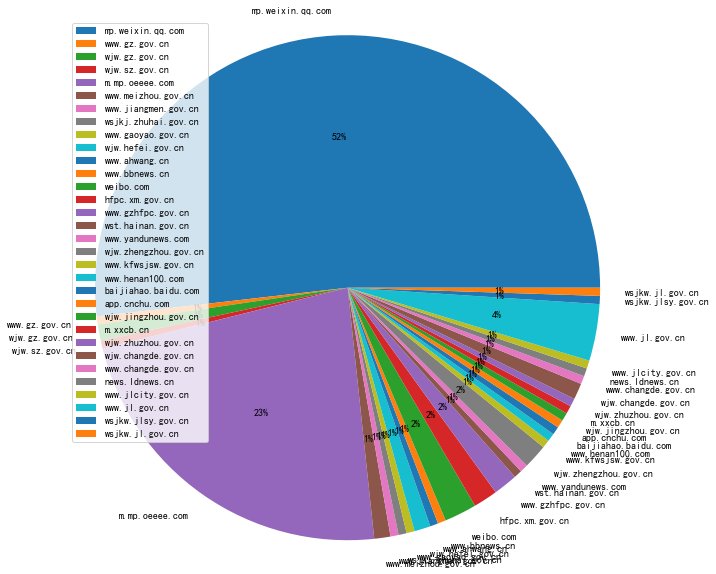

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(10,10)) #调?节图形大小
# labels = [u'大型',u'中型',u'小型',u'微型'] #定义标签
labels = url_set.keys()
# sizes = [46,253,321,66] #每块值
sizes = url_set.values()
# colors = ['red','yellowgreen','lightskyblue','yellow'] #每块颜色定义
# explode = (0,0,0.02,0) #将某一块分割出来，值越大分割出的间隙越大
plt.pie(sizes,labels=labels,autopct='%.0f%%')

plt.axis('equal')
plt.legend()
plt.show()
plt.savefig("./pieweixin.png")

# 清理badurl

# 访问不到的

In [33]:
import selenium

In [34]:
# 那些挂了的链接
import time
def clean_data(url_df,driver,use_driver=False):
    ''' 
        input:url_df,driver
    
        output:url_df_good,url_df_bad
    '''
    url_df_good = []
    url_df_bad = []
#     bad = [] 
    s = time.time()
    for i in range(len(url_df)):
        u = url_df[i]
        print('[%d/%d]'%(i+1,len(url_df)),end='\r')
        try:
            r = requests.get(u,timeout=5)
        except Exception as e:
            url_df_bad.append(u)
            continue
        if r.status_code != requests.codes.ok:
            url_df_bad.append(u)
            continue
        url_df_good.append(u)
    good = pd.DataFrame(url_df_good)
    bad = pd.DataFrame(url_df_bad)
    
    e = time.time()
    time_elsap = e-s
    print(time_elsap)
    
    return good,bad

good,bad = clean_data(df['url'],driver)

117.96630191802979


# 手工check

In [41]:
bad[0].tolist()

['http://www.jiangmen.gov.cn/home/zwyw/content/post_1970234.html',
 'http://wsjkj.zhuhai.gov.cn/zwgk/tzgg/content/post_2466822.html',
 'http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/xxfb/17723463.html',
 'http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/xxfb/17723955.html',
 'http://wjw.zhengzhou.gov.cn/qwfb/2345654.jhtml',
 'http://wjw.zhengzhou.gov.cn/qwfb/2348027.jhtml',
 'http://wjw.zhengzhou.gov.cn/qwfb/2346837.jhtml',
 'http://wjw.jingzhou.gov.cn/ztzl/fkxxgz/202002/t20200208_454770.shtml',
 'http://www.changde.gov.cn/cdzx/cdyw/content_717733',
 'http://www.jlcity.gov.cn/zt/qtzt/kjxgfy/tzgg/202002/t20200203_730660.html']


'http://wjw.zhengzhou.gov.cn/qwfb/2345654.jhtml',
 'http://wjw.zhengzhou.gov.cn/qwfb/2348027.jhtml',
 'http://wjw.zhengzhou.gov.cn/qwfb/2346837.jhtml',
 http://wjw.jingzhou.gov.cn/ztzl/fkxxgz/202002/t20200208_454770.shtml
 http://www.changde.gov.cn/cdzx/cdyw/content_717733

In [42]:
bad[0]

0    http://www.jiangmen.gov.cn/home/zwyw/content/p...
1    http://wsjkj.zhuhai.gov.cn/zwgk/tzgg/content/p...
2    http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/x...
3    http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/x...
4       http://wjw.zhengzhou.gov.cn/qwfb/2345654.jhtml
5       http://wjw.zhengzhou.gov.cn/qwfb/2348027.jhtml
6       http://wjw.zhengzhou.gov.cn/qwfb/2346837.jhtml
7    http://wjw.jingzhou.gov.cn/ztzl/fkxxgz/202002/...
8    http://www.changde.gov.cn/cdzx/cdyw/content_71...
9    http://www.jlcity.gov.cn/zt/qtzt/kjxgfy/tzgg/2...
Name: 0, dtype: object

In [39]:
good[0]

0      https://mp.weixin.qq.com/s/N76fZ6R4zeiB6Zqa3TYaxg
1      http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/cont...
2      http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
3      https://mp.weixin.qq.com/s/KkYpkD4oV997_ZPNRa0vHg
4      http://wjw.sz.gov.cn/yqxx/202002/t20200203_189...
                             ...                        
178    https://mp.weixin.qq.com/s/gb33Pz92gZiVFRe1hy0YyQ
179    http://wsjkw.jlsy.gov.cn/xwzx/jgdt/202002/t202...
180    http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...
181    http://www.jl.gov.cn/szfzt/jlzxd/yqtb/202002/t...
182    http://wsjkw.jl.gov.cn/xwzx/xwfb/202002/t20200...
Name: 0, Length: 183, dtype: object

In [179]:
bad

,0
0,http://wjw.shanxi.gov.cn/wjywl02/24757.hrh
1,http://wjw.shanxi.gov.cn/wjywl02/24774.hrh
2,http://www.wuzhong.gov.cn/sy/gsgg/202002/t2020...
3,http://www.wuzhong.gov.cn/sy/gsgg/202002/t2020...
4,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
5,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
6,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...


In [180]:
bad[0][[0,1,4,5,6]]

0           http://wjw.shanxi.gov.cn/wjywl02/24757.hrh
1           http://wjw.shanxi.gov.cn/wjywl02/24774.hrh
4    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
5    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
6    https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
Name: 0, dtype: object

In [43]:
fix = good[0].append(bad[0][[0,1,2,3,9]])

# good.reset_index(drop=True,inplace = True)

In [44]:
fix.reset_index(drop=True,inplace = True)

In [45]:
fix

0      https://mp.weixin.qq.com/s/N76fZ6R4zeiB6Zqa3TYaxg
1      http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/cont...
2      http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
3      https://mp.weixin.qq.com/s/KkYpkD4oV997_ZPNRa0vHg
4      http://wjw.sz.gov.cn/yqxx/202002/t20200203_189...
                             ...                        
183    http://www.jiangmen.gov.cn/home/zwyw/content/p...
184    http://wsjkj.zhuhai.gov.cn/zwgk/tzgg/content/p...
185    http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/x...
186    http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/x...
187    http://www.jlcity.gov.cn/zt/qtzt/kjxgfy/tzgg/2...
Name: 0, Length: 188, dtype: object

In [46]:
good_url  =pd.DataFrame(fix)

In [47]:
good_url.rename(columns={0:'url'},inplace = True)

In [48]:
good_url

,url
0,https://mp.weixin.qq.com/s/N76fZ6R4zeiB6Zqa3TYaxg
1,http://www.gz.gov.cn/zt/qlyfdyyqfkyz/qktb/cont...
2,http://wjw.gz.gov.cn/ztzl/xxfyyqfk/yqtb/conten...
3,https://mp.weixin.qq.com/s/KkYpkD4oV997_ZPNRa0vHg
4,http://wjw.sz.gov.cn/yqxx/202002/t20200203_189...
...,...
183,http://www.jiangmen.gov.cn/home/zwyw/content/p...
184,http://wsjkj.zhuhai.gov.cn/zwgk/tzgg/content/p...
185,http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/x...
186,http://wjw.hefei.gov.cn/ztzl/xxgzbdgrdfyyqfk/x...


# 公众号迁移

In [49]:
# 'https://mp.weixin.qq.com/s/hywpRGEm_OJepGkhPbqYOQ'

In [50]:
def weixin_qianxi(good_url):
    wx_host = 'mp.weixin.qq.com'
    olds = []
    news = []
    n = len(good_url['url'])
    for i in range(n):
        url = good_url['url'][i]
        old = url
        new_url = ''
        if wx_host in url:
            driver.get(url)
            try:
                html =  driver.page_source
            except Expection as e:
                pass
            soup = BeautifulSoup(html, 'lxml')
            r = soup.find_all(attrs={'id': 'js_access_msg'})
            if r != []:
                good_url['url'][i] = r[0]['href']
                olds.append(old)
                news.append(r[0]['href'])
    return olds,news

In [51]:
o,n = weixin_qianxi(good_url)

In [52]:
o

[]

In [49]:
good_url['url'][good_url['url'][good_url['url']=='http://mp.weixin.qq.com/s?__biz=MzI3NDE1NTQ2NQ==&mid=2247484445&amp;idx=1&amp;sn=ebf7bd5008d7749ed6eed1ab839df87d&source=41#wechat_redirect'].index] = 'https://mp.weixin.qq.com/s?__biz=MzI3NDE1NTQ2NQ==&mid=2247484445&amp;idx=1&amp;sn=ebf7bd5008d7749ed6eed1ab839df87d&source=41#wechat_redirect'

In [50]:
for i in good_url['url']:
    if 'weixin' in i :
        print (i)

https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA
https://mp.weixin.qq.com/s/03w_HdZGypbtAG33jikquw
https://mp.weixin.qq.com/s/0xihh12dgBBxbfozR6fnNg
https://mp.weixin.qq.com/s/0zzx4G3oUPQmzNk6JTTUzQ
https://mp.weixin.qq.com/s/15bQoiHzj8ABrnySvnEtQA
https://mp.weixin.qq.com/s/16ICfUi-Z2UMbbckkm0Xpw
https://mp.weixin.qq.com/s/1gv6bdr4kVBq4nUYOMqJHg
https://mp.weixin.qq.com/s/1l-RCQ_OfAMhOZZSmo2sDw
https://mp.weixin.qq.com/s/21pwvOkvunpCGf0F8UGsKQ
https://mp.weixin.qq.com/s/22zfhtcc5aqqWpt0anCVOQ
https://mp.weixin.qq.com/s/23fOSN0X3dT99e22m34Few
https://mp.weixin.qq.com/s/2COYPOACgINLbVZGLJ20pw
https://mp.weixin.qq.com/s/2HRalKs46VxIkbLMBBGbCA
https://mp.weixin.qq.com/s/2J9_3bKsljNLeVmFqY4rxQ
https://mp.weixin.qq.com/s/2ri05eGgAq5QHorGkz07sw
https://mp.weixin.qq.com/s/3_ru000m-BsCB3uAjbohAg
https://mp.weixin.qq.com/s/39apxV_xQLEu0MJ5ToE__g
https://mp.weixin.qq.com/s/3GBAMxcOz-brFl_7_soiXg
https://mp.weixin.qq.com/s/40KCQ1yZszq1b5OMNsRctg
https://mp.weixin.qq.com/s/4JrjMJc7lPDCFHXY3LFSeQ


# 保存

In [53]:
good_url.to_csv('./goodurl_5.10.csv')
# bad.to_csv('./bad_url.csv')

# with_raw_html

In [38]:
driver = webdriver.Chrome()
driver.get('https://weibo.com')

In [164]:
good_url = pd.read_csv('./goodURL_5.1.csv')
del good_url['Unnamed: 0']
good_url.rename(columns={'0':'url'},inplace=True) 

In [196]:
good_url

,url
0,https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA
1,http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...
2,http://m.ha.bendibao.com/mip/1636.shtm
3,http://news.gxnews.com.cn/staticpages/20200209...
4,http://o.xiancity.cn/system/2020/02/09/0307133...
...,...
184,http://wjw.shanxi.gov.cn/wjywl02/24757.hrh
185,http://wjw.shanxi.gov.cn/wjywl02/24774.hrh
186,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
187,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...


In [197]:
def GETHTML(url,driver):
    ''' 
        input:url,driver
    
        output:GETHTML
    '''
    html =  ''
    # 用引擎
    driver.get(url)
    sleep(0.2)
    try:
        html =  driver.page_source
    except Expection as e:
        print(e)
    return html

In [198]:
good_url['raw_html'] = good_url['url'].apply(lambda x:GETHTML(x,driver))

In [199]:
good_url

,url,raw_html
0,https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA,"<html class=""\n\n""><head>\n ..."
1,http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...,"<html lang=""en""><head>\n <meta charset=""UTF-8..."
2,http://m.ha.bendibao.com/mip/1636.shtm,"<html mip="""" class=""mip-i-android-scroll""><hea..."
3,http://news.gxnews.com.cn/staticpages/20200209...,"<html><head><script type=""text/javascript"" asy..."
4,http://o.xiancity.cn/system/2020/02/09/0307133...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
...,...,...
184,http://wjw.shanxi.gov.cn/wjywl02/24757.hrh,<html><head>\n\t\t<title>山西省卫生健康委员会网站-卫健要闻</ti...
185,http://wjw.shanxi.gov.cn/wjywl02/24774.hrh,<html><head>\n\t\t<title>山西省卫生健康委员会网站-卫健要闻</ti...
186,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...,"<html lang=""en""><head><script src=""https://hm...."
187,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...,"<html lang=""en""><head><script src=""https://hm...."


In [200]:
good_url.to_csv('./good_url_withRawHtml_5.1.csv')

# 临时

In [38]:
path = '../标注/ourdev.dev'

In [40]:
s = ''
with open(path,'r+',encoding="gbk") as f:
    s = f.read()

In [41]:
s

'， O\n累 O\n计 O\n1 O\n3 O\n5 O\n6 O\n2 O\n人 O\n， O\n均 O\n集 O\n中 O\n医 O\n学 O\n观 O\n察 O\n。 O\n新 O\n增 O\n解 O\n除 O\n密 O\n切 O\n接 O\n触 O\n者 O\n5 O\n9 O\n0 O\n人 O\n， O\n累 O\n计 O\n解 O\n除 O\n密 O\n切 O\n接 O\n触 O\n者 O\n7 O\n4 O\n9 O\n8 O\n人 O\n。 O\n\n患 O\n者 O\n1 O\n， O\n男 O\n， O\n5 O\n8 O\n岁 O\n， O\n现 O\n居 O\n西 O\n安 O\n市 O\n高 O\n新 O\n区 O\n。 O\n1 O\n月 O\n1 O\n9 O\n日 O\n从 O\n上 O\n海 O\n市 O\n到 O\n西 O\n安 O\n市 O\n， O\n2 O\n月 O\n2 O\n日 O\n出 O\n现 O\n症 O\n状 O\n， O\n自 O\n行 O\n服 O\n药 O\n效 O\n果 O\n不 O\n佳 O\n。 O\n2 O\n月 O\n7 O\n日 O\n症 O\n状 O\n加 O\n重 O\n到 O\n西 O\n安 O\n高 O\n新 O\n医 O\n院 O\n就 O\n诊 O\n， O\n2 O\n月 O\n8 O\n日 O\n被 O\n转 O\n至 O\n西 O\n安 O\n市 O\n胸 O\n科 O\n医 O\n院 O\n。 O\n2 O\n月 O\n1 O\n3 O\n日 O\n被 O\n诊 O\n断 O\n为 O\n新 O\n冠 O\n肺 O\n炎 O\n。 O\n目 O\n前 O\n在 O\n西 O\n安 O\n市 O\n胸 O\n科 O\n医 O\n院 O\n隔 O\n离 O\n治 O\n疗 O\n。 O\n\n患 O\n者 O\n2 O\n， O\n男 O\n， O\n5 O\n0 O\n岁 O\n， O\n现 O\n居 O\n西 O\n安 O\n市 O\n新 O\n城 O\n区 O\n， O\n所 O\n居 O\n单 O\n元 O\n楼 O\n有 O\n确 O\n诊 O\n患 O\n者 O\n（ O\n2 O\n月 O\n2 O\n日 O\n确 O\n诊 O\n患 O\n者 O\n1 O\n